# Inventory the EADs

This notebook can be modified to create a list of the EAD files you are working with. 
Things that you will need include:

* Ability to make modifications of python code, specifically to add in the correct file path references. 
* Work with python dictionaries and modify the CSV writer function if you want to add information to the inventory. 

## Setup

To get started, import the `os` module (for working with files and filepaths), 
the `re` module (for using regular expressions to parse the filenames), 
the `csv` module (to aid in writing CSV files).

In [2]:
import os
import re
import csv

## Create the Inventory 

1. First, look through the files to count and list out the XMLs. 
3. Write out to csv

Let's get started:

### Go through files and inventory each EAD document

In [3]:
xml_directory = os.path.join(os.getcwd(),'xml-files')

bentley_dir = 'Bentley Finding Aids - XML'
clements_dir = 'Clements Library - XML'
scrc_dir = 'SCRC Finding Aids - XML'

bentley_FAs = os.path.join(xml_directory, bentley_dir, 'Finding Aids')
clements_FAs = os.path.join(xml_directory, clements_dir)
scrc_FAs = os.path.join(xml_directory, scrc_dir)

In [4]:
xml_directory

'/Users/jajohnst/Documents/rcrc-ead-project/ReConnect-ReCollect_Automation/xml-files'

In [4]:
# walk the directories
dirpaths = [bentley_FAs, clements_FAs, scrc_FAs]

xml_count = 0
ead_list = []

for dirpath in dirpaths:
    for root, dirnames, files in os.walk(dirpath):
        for file in files:
            if file.endswith('.xml'):
                file_info = {}
                file_info['index'] = xml_count
                if re.search('Bentley', root):
                    file_info['repository'] = 'Bentley Historical Library (umich-bhl)'
                    file_info['folder'] = bentley_dir
                if re.search('SCRC', root):
                    file_info['repository'] = 'Special Collections (umich-scl)'
                    file_info['folder'] = scrc_dir
                if re.search('Clements', root):
                    file_info['repository'] = 'Clements Library (umich-wcl)'
                    file_info['folder'] = clements_dir
                # each repository followed different naming conventions, so this isn't always ead_id
#                file_info['ead_id'] = file.split('.')[0]
                file_info['filename'] = file
#                file_info['path'] = root + file
                ead_list.append(file_info)
                xml_count += 1
print('Inventoried',len(ead_list),'finding aids.')
    

Inventoried 247 finding aids.


### Write the inventory to a CSV

Now, write a CSV file that presents an inventory of the finding aids inventoried above. 

In [6]:
xml_manifest = 'rcrc_xml_manifest.csv'
headers = ['index','repository','folder','filename']

with open(xml_manifest, 'w', encoding='utf-8') as f:
    manifest = csv.DictWriter(f, fieldnames=headers)
    manifest.writeheader()
    for ead in ead_list:
        manifest.writerow(ead)
    print('wrote',xml_manifest)

wrote rcrc_xml_manifest.csv


Now, the file should be accessible under the name you selected above. 
If you didn't make any modifications, that name is `rcrc_xml_manifest.csv` 
and should be visible in the folder where you are running this notebook. 

## Visualize the data

The CSV is highly useful for our Pythonic tools, but it may also be useful to have a visual overview. 
This section shows how to create a basic visualization of the distribution of the finding aids. 
The visualization is built with `pandas` and `plotly` tools.

### Setup

In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio

Using the ead_list from previously, the next blocks create 
a dataframe in `pandas` that can be visualized using `plotly`.

In [7]:
df = pd.DataFrame.from_dict(ead_list)

In [10]:
df.head()

,index,repository,folder,filename
0,0,Bentley Historical Library (umich-bhl),Bentley Finding Aids - XML,umich-bhl-86466.xml
1,1,Bentley Historical Library (umich-bhl),Bentley Finding Aids - XML,umich-bhl-2011162.xml
2,2,Bentley Historical Library (umich-bhl),Bentley Finding Aids - XML,umich-bhl-86102.xml
3,3,Bentley Historical Library (umich-bhl),Bentley Finding Aids - XML,umich-bhl-2014032.xml
4,4,Bentley Historical Library (umich-bhl),Bentley Finding Aids - XML,umich-bhl-9843.xml


In [137]:
# group by repositories

by_repositories = df.groupby('repository').count().iloc[:,:1].sort_values('index')

by_repositories

,index
repository,
Special Collections (umich-scl),23
Clements Library (umich-wcl),67
Bentley Historical Library (umich-bhl),157


In [ ]:
by_repositories.to_csv('finding-aid-distribution-by-repository.csv')

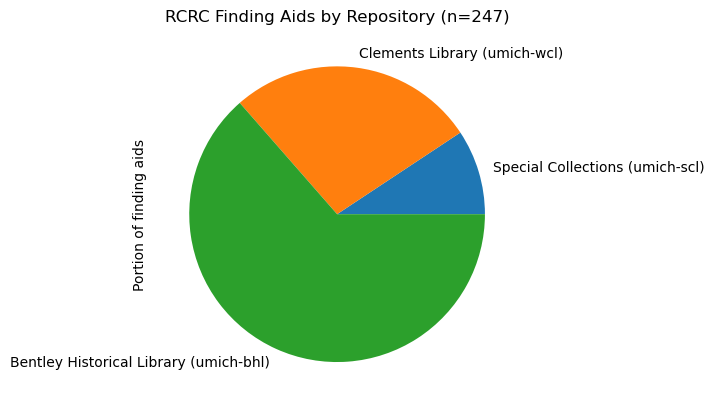

In [169]:
# generate pie using pandas plot
plot = by_repositories.plot.pie(y='index', ylabel='Portion of finding aids',
                                title='RCRC Finding Aids by Repository (n=247)',
                                legend=False)



In [171]:
# generate with plotly.express
fig = px.pie(data_frame=by_repositories, values='index', names=['Special Collections', 'Clements Library', 'Bentley Historical Library'], title='RCRC Finding Aids by Repository')
fig.update()
fig.update_traces(hoverinfo='percent', textinfo='label+value', textposition='outside', title_font_family='Georgia, serif')

fig.show()